# **Case Study 1: How Does a Bike-Share Navigate Speedy Success?**

**Introduction**

This is my capsotone case study for the Google Data Analytics Professional Certificate. I'm Using R notebook for the 6 phase of analysis process.(Ask, Prepare, Process, Analyze, Share and Act)

**Scenario**

I am a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, my team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, my team will design a new marketing strategy to convert casual riders into annual members.

**About the company**

In 2016, Cyclistic launched a successful bike-share oering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime. Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members. Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, The director of marketing believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, she believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.

### **Ask**

**Identify the business task:**

Three questions will guide the future marketing program:

* How do annual members and casual riders use Cyclistic bikes differently?
* Why would casual riders buy Cyclistic annual memberships?
* How can Cyclistic use digital media to influence casual riders to become members?


### **Prepare**

The data used in this analysis is made available to the public and located [here](https://divvy-tripdata.s3.amazonaws.com/index.html)
Note: The datasets have a different name because Cyclistic is a fictional company. For the purposes of this case study,the datasets are appropriate and will enable you to answer the business questions. These data were in “.csv” format divided by months. Based on the requirement of the project activity, I downloaded the data for the months from January 2021 to September 2022.

### **Process**

For the analysis, I will be use R. 
I will start by installing and loading required R packages to do data cleaning, manipulation and vizualization for my analysis


In [1]:
library(tidyverse)
#package for data wrangling
library(lubridate)
#for date formats
library(ggplot2)
#for visualizing the data
library(dplyr)
#for cleaning the data
library(tidyr)
#for cleaning the data

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
#loading data from local strorage
#I use the monthy data from august 2021 - july 2022
aug_21 <- read.csv("../input/cyclistic-trips-202108-to-202207/202108-divvy-tripdata.csv")
sep_21 <- read.csv("../input/cyclistic-trips-202108-to-202207/202109-divvy-tripdata.csv")
oct_21 <- read.csv("../input/cyclistic-trips-202108-to-202207/202110-divvy-tripdata.csv")
nov_21 <- read.csv("../input/cyclistic-trips-202108-to-202207/202111-divvy-tripdata.csv")
dec_21 <- read.csv("../input/cyclistic-trips-202108-to-202207/202112-divvy-tripdata.csv")
jan_22 <- read.csv("../input/cyclistic-trips-202108-to-202207/202201-divvy-tripdata.csv")
feb_22 <- read.csv("../input/cyclistic-trips-202108-to-202207/202202-divvy-tripdata.csv")
mar_22 <- read.csv("../input/cyclistic-trips-202108-to-202207/202203-divvy-tripdata.csv")
apr_22 <- read.csv("../input/cyclistic-trips-202108-to-202207/202204-divvy-tripdata.csv")
may_22 <- read.csv("../input/cyclistic-trips-202108-to-202207/202205-divvy-tripdata.csv")
jun_22 <- read.csv("../input/cyclistic-trips-202108-to-202207/202206-divvy-tripdata.csv")
jul_22 <- read.csv("../input/cyclistic-trips-202108-to-202207/202207-divvy-tripdata.csv")


In [3]:
#merged all the dataset

trip_data <- rbind(aug_21, 
                   sep_21,
                   oct_21,
                   nov_21,
                   dec_21,
                   jan_22,
                   feb_22,
                   mar_22,
                   apr_22,
                   may_22,
                   jun_22,
                   jul_22)

In [4]:
#cheking combined data
head(trip_data)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,99103BB87CC6C1BB,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,,,,,41.77,-87.68,41.77,-87.68,member
2,EAFCCCFB0A3FC5A1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,,,,,41.77,-87.68,41.77,-87.63,member
3,9EF4F46C57AD234D,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,,,,,41.95,-87.65,41.97,-87.66,member
4,5834D3208BFAF1DA,electric_bike,2021-08-21 06:52:55,2021-08-21 07:08:13,,,,,41.97,-87.67,41.95,-87.65,member
5,CD825CB87ED1D096,electric_bike,2021-08-19 11:55:29,2021-08-19 12:04:11,,,,,41.79,-87.60,41.77,-87.62,member
6,612F12C94A964F3E,electric_bike,2021-08-19 12:41:12,2021-08-19 12:47:47,,,,,41.81,-87.61,41.80,-87.60,member


In [5]:

str(trip_data)

'data.frame':	5901463 obs. of  13 variables:
 $ ride_id           : chr  "99103BB87CC6C1BB" "EAFCCCFB0A3FC5A1" "9EF4F46C57AD234D" "5834D3208BFAF1DA" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : chr  "2021-08-10 17:15:49" "2021-08-10 17:23:14" "2021-08-21 02:34:23" "2021-08-21 06:52:55" ...
 $ ended_at          : chr  "2021-08-10 17:22:44" "2021-08-10 17:39:24" "2021-08-21 02:50:36" "2021-08-21 07:08:13" ...
 $ start_station_name: chr  "" "" "" "" ...
 $ start_station_id  : chr  "" "" "" "" ...
 $ end_station_name  : chr  "" "" "" "" ...
 $ end_station_id    : chr  "" "" "" "" ...
 $ start_lat         : num  41.8 41.8 42 42 41.8 ...
 $ start_lng         : num  -87.7 -87.7 -87.7 -87.7 -87.6 ...
 $ end_lat           : num  41.8 41.8 42 42 41.8 ...
 $ end_lng           : num  -87.7 -87.6 -87.7 -87.7 -87.6 ...
 $ member_casual     : chr  "member" "member" "member" "member" ...


In [6]:
#check duplicates
sum(duplicated(trip_data$ride_id))

[1] 0

There is 0 duplicates in this data.

In [7]:
#problem in date variable so lets parsing datetime columns
trip_data$started_at <- as.POSIXct(trip_data$started_at, "%Y-%m-%d %H:%M:%S")
trip_data$ended_at <- as.POSIXct(trip_data$ended_at, "%Y-%m-%d %H:%M:%S")

In [8]:
str(trip_data)

'data.frame':	5901463 obs. of  13 variables:
 $ ride_id           : chr  "99103BB87CC6C1BB" "EAFCCCFB0A3FC5A1" "9EF4F46C57AD234D" "5834D3208BFAF1DA" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : POSIXct, format: "2021-08-10 17:15:49" "2021-08-10 17:23:14" ...
 $ ended_at          : POSIXct, format: "2021-08-10 17:22:44" "2021-08-10 17:39:24" ...
 $ start_station_name: chr  "" "" "" "" ...
 $ start_station_id  : chr  "" "" "" "" ...
 $ end_station_name  : chr  "" "" "" "" ...
 $ end_station_id    : chr  "" "" "" "" ...
 $ start_lat         : num  41.8 41.8 42 42 41.8 ...
 $ start_lng         : num  -87.7 -87.7 -87.7 -87.7 -87.6 ...
 $ end_lat           : num  41.8 41.8 42 42 41.8 ...
 $ end_lng           : num  -87.7 -87.6 -87.7 -87.7 -87.6 ...
 $ member_casual     : chr  "member" "member" "member" "member" ...


In [9]:
#Calculate the ride time in minutes
trip_data <- trip_data %>%
    mutate(ride_duration_min = as.numeric(trip_data$ended_at-trip_data$started_at)/60)

In [10]:
head(trip_data)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration_min
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,99103BB87CC6C1BB,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,,,,,41.77,-87.68,41.77,-87.68,member,6.916667
2,EAFCCCFB0A3FC5A1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,,,,,41.77,-87.68,41.77,-87.63,member,16.166667
3,9EF4F46C57AD234D,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,,,,,41.95,-87.65,41.97,-87.66,member,16.216667
4,5834D3208BFAF1DA,electric_bike,2021-08-21 06:52:55,2021-08-21 07:08:13,,,,,41.97,-87.67,41.95,-87.65,member,15.300000
5,CD825CB87ED1D096,electric_bike,2021-08-19 11:55:29,2021-08-19 12:04:11,,,,,41.79,-87.60,41.77,-87.62,member,8.700000
6,612F12C94A964F3E,electric_bike,2021-08-19 12:41:12,2021-08-19 12:47:47,,,,,41.81,-87.61,41.80,-87.60,member,6.583333


In [11]:
summary(trip_data)

   ride_id          rideable_type        started_at                 
 Length:5901463     Length:5901463     Min.   :2021-08-01 00:00:04  
 Class :character   Class :character   1st Qu.:2021-09-27 12:35:12  
 Mode  :character   Mode  :character   Median :2022-02-14 14:10:08  
                                       Mean   :2022-01-31 21:50:42  
                                       3rd Qu.:2022-06-05 15:29:40  
                                       Max.   :2022-07-31 23:59:58  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2021-08-01 00:03:11   Length:5901463     Length:5901463    
 1st Qu.:2021-09-27 12:54:02   Class :character   Class :character  
 Median :2022-02-14 14:20:23   Mode  :character   Mode  :character  
 Mean   :2022-01-31 22:10:35                                        
 3rd Qu.:2022-06-05 15:54:48                                        
 Max.   :2022-08-04 13:53:01      

In [12]:
#seperate the  column for date, weekday, month and year
trip_data$date <- as.Date(trip_data$started_at, "%Y-%m-%d")
trip_data$year <- format(as.Date(trip_data$started_at),"%y")
trip_data$month <- format(as.Date(trip_data$date), "%m")
trip_data$day_of_week <- format(as.Date(trip_data$date),"%A")

In [13]:
head(trip_data)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration_min,date,year,month,day_of_week
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<date>,<chr>,<chr>,<chr>
1,99103BB87CC6C1BB,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,,,,,41.77,-87.68,41.77,-87.68,member,6.916667,2021-08-10,21,08,Tuesday
2,EAFCCCFB0A3FC5A1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,,,,,41.77,-87.68,41.77,-87.63,member,16.166667,2021-08-10,21,08,Tuesday
3,9EF4F46C57AD234D,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,,,,,41.95,-87.65,41.97,-87.66,member,16.216667,2021-08-21,21,08,Saturday
4,5834D3208BFAF1DA,electric_bike,2021-08-21 06:52:55,2021-08-21 07:08:13,,,,,41.97,-87.67,41.95,-87.65,member,15.300000,2021-08-21,21,08,Saturday
5,CD825CB87ED1D096,electric_bike,2021-08-19 11:55:29,2021-08-19 12:04:11,,,,,41.79,-87.60,41.77,-87.62,member,8.700000,2021-08-19,21,08,Thursday
6,612F12C94A964F3E,electric_bike,2021-08-19 12:41:12,2021-08-19 12:47:47,,,,,41.81,-87.61,41.80,-87.60,member,6.583333,2021-08-19,21,08,Thursday


In [14]:
unique(trip_data$day_of_week)

[1] "Tuesday"   "Saturday"  "Thursday"  "Friday"    "Wednesday" "Sunday"   
[7] "Monday"

In [15]:
#Getting the hour of the day also useful for intra day analysis
trip_data_n <-  mutate(trip_data, start_hour = strftime(started_at,"%H"))

In [16]:
summary(trip_data_n)

   ride_id          rideable_type        started_at                 
 Length:5901463     Length:5901463     Min.   :2021-08-01 00:00:04  
 Class :character   Class :character   1st Qu.:2021-09-27 12:35:12  
 Mode  :character   Mode  :character   Median :2022-02-14 14:10:08  
                                       Mean   :2022-01-31 21:50:42  
                                       3rd Qu.:2022-06-05 15:29:40  
                                       Max.   :2022-07-31 23:59:58  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2021-08-01 00:03:11   Length:5901463     Length:5901463    
 1st Qu.:2021-09-27 12:54:02   Class :character   Class :character  
 Median :2022-02-14 14:20:23   Mode  :character   Mode  :character  
 Mean   :2022-01-31 22:10:35                                        
 3rd Qu.:2022-06-05 15:54:48                                        
 Max.   :2022-08-04 13:53:01      

In [17]:
print(unique(trip_data_n$ride_duration_min<0))


[1] FALSE  TRUE


we can see that in ride_duration_min columns having  negative value.

In [18]:
#remove the negative values in ride duration
print(paste('Before removing negative durations, our dataframe had', nrow(trip_data_n), 'rows'))
trip_data_n <- trip_data_n[trip_data_n$ride_duration_min>0,]
print(paste('After removing negative durations, our data frame had', nrow(trip_data_n), 'rows'))

[1] "Before removing negative durations, our dataframe had 5901463 rows"
[1] "After removing negative durations, our data frame had 5900827 rows"


In [19]:
glimpse(trip_data_n)

Rows: 5,900,827
Columns: 19
$ ride_id            <chr> "99103BB87CC6C1BB", "EAFCCCFB0A3FC5A1", "9EF4F46C57…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <dttm> 2021-08-10 17:15:49, 2021-08-10 17:23:14, 2021-08-…
$ ended_at           <dttm> 2021-08-10 17:22:44, 2021-08-10 17:39:24, 2021-08-…
$ start_station_name <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ start_station_id   <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ end_station_name   <chr> "", "", "", "", "", "", "", "Clark St & Grace St", …
$ end_station_id     <chr> "", "", "", "", "", "", "", "TA1307000127", "", "",…
$ start_lat          <dbl> 41.77000, 41.77000, 41.95000, 41.97000, 41.79000, 4…
$ start_lng          <dbl> -87.68000, -87.68000, -87.65000, -87.67000, -87.600…
$ end_lat            <dbl> 41.77000, 41.77000, 41.97000, 41.95000, 41.77000, 4…
$ end_lng            <dbl> -87.68000, -87.63000, -87.66000, -87.65000, -87.620…
$ member_cas

In [20]:
trip_data_n$start_hour <- as.numeric(trip_data_n$start_hour)
cleaned_data <- trip_data_n

### Analyze

Here now I cleaned the data and i will anlayse the processed data for gaining valuable insights.

In [21]:

summary(cleaned_data)

   ride_id          rideable_type        started_at                 
 Length:5900827     Length:5900827     Min.   :2021-08-01 00:00:04  
 Class :character   Class :character   1st Qu.:2021-09-27 12:36:11  
 Mode  :character   Mode  :character   Median :2022-02-14 14:27:20  
                                       Mean   :2022-01-31 21:55:21  
                                       3rd Qu.:2022-06-05 15:30:41  
                                       Max.   :2022-07-31 23:59:58  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2021-08-01 00:03:11   Length:5900827     Length:5900827    
 1st Qu.:2021-09-27 12:54:58   Class :character   Class :character  
 Median :2022-02-14 14:40:15   Mode  :character   Mode  :character  
 Mean   :2022-01-31 22:15:15                                        
 3rd Qu.:2022-06-05 15:55:30                                        
 Max.   :2022-08-04 13:53:01      

In [22]:
#cheking the average duration of causual vs  member
aggregate(cleaned_data$ride_duration_min ~ cleaned_data$member_casual, FUN=mean)

cleaned_data$member_casual,cleaned_data$ride_duration_min
<chr>,<dbl>
casual,29.21599
member,12.93354


We can see that the average duration of casual members is longer than annual member.

In [23]:
#data distributed by month
cleaned_data%>%
    group_by(month)%>%
    summarise(count=length(ride_id),
    
              'member_casual_%'= (length(ride_id)/nrow(cleaned_data)*100),
    
              'member_p' = (sum(member_casual == 'member')/length(ride_id)*100),
       
              'casual_p' = (sum(member_casual == 'casual')/length(ride_id)*100),
        
              'member_casual_diff_%' = member_p - casual_p )

month,count,member_casual_%,member_p,casual_p,member_casual_diff_%
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
01,103765,1.758482,82.15487,17.84513,64.309738
02,115604,1.959115,81.47642,18.52358,62.952839
03,284024,4.813291,68.35690,31.64310,36.713799
04,371218,6.290949,65.95047,34.04953,31.900932
05,634810,10.757984,55.83135,44.16865,11.662702
06,769138,13.034410,52.02135,47.97865,4.042708
07,823416,13.954247,50.69163,49.30837,1.383262
08,804245,13.629361,48.69623,51.30377,-2.607539
09,756040,12.812441,51.87556,48.12444,3.751124


In [24]:
#count of casual and annual member
Viz_1 <- cleaned_data %>%
    group_by(member_casual)%>%
    summarise(count = length(ride_id), 
              "percent" = round((length(ride_id)/nrow(cleaned_data))*100))
tibble(Viz_1)

member_casual,count,percent
<chr>,<int>,<dbl>
casual,2521889,43
member,3378938,57


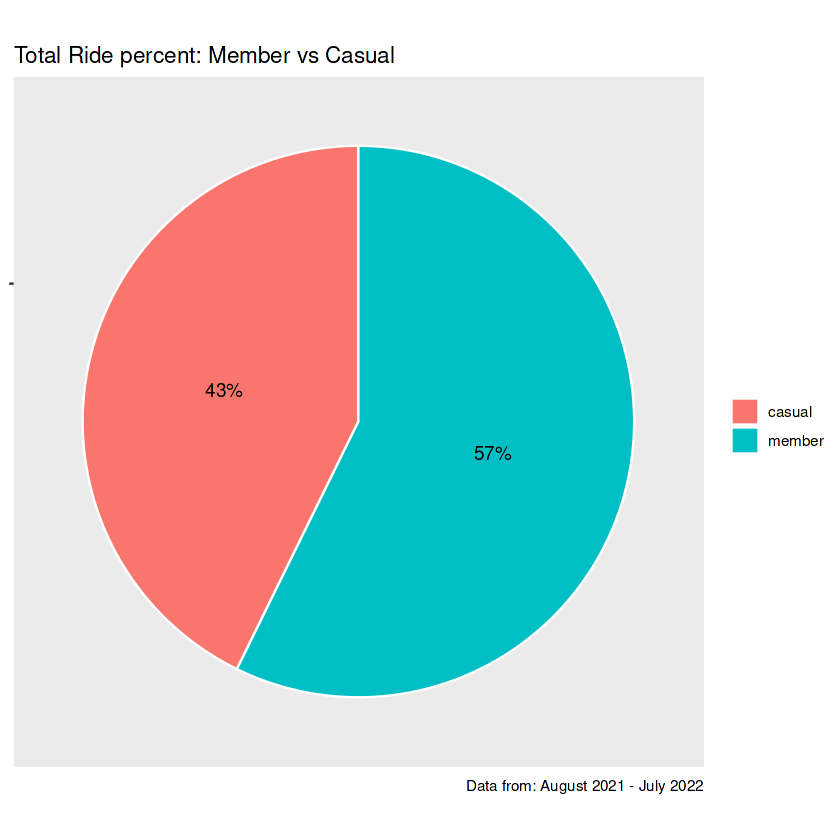

In [25]:

ggplot(data=Viz_1, aes(x=" ", y=count,  fill=member_casual))+
    geom_bar(stat="identity", width=1, color="white")+
    coord_polar("y", start=0)+
    theme(axis.title.x=element_blank(), axis.title.y=element_blank(), axis.text.x=element_blank(), axis.text.y = element_blank(), panel.border=element_blank(), panel.grid=element_blank(), legend.title=element_blank())+
    labs(title="Total Ride percent: Member vs Casual", caption="Data from: August 2021 - July 2022")+
geom_text(aes(y=count, label=paste0(percent, "%")), color='black', position = position_stack(vjust=0.5))

We can see that the annual member is 14% more than the casual member.

In [26]:
#summarize data according to month
cleaned_data %>%
    group_by(month,year) %>%
    summarise(count = length(ride_id),
              '%' = (length(ride_id) / nrow(cleaned_data)) * 100,
              'members_percent' = round((sum(member_casual == "member") / length(ride_id)) * 100),
              'casual_percent' = round((sum(member_casual == "casual") / length(ride_id)) * 100),
              'Member x Casual Perc Difer' = members_percent - casual_percent)

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


month,year,count,%,members_percent,casual_percent,Member x Casual Perc Difer
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
01,22,103765,1.758482,82,18,64
02,22,115604,1.959115,81,19,62
03,22,284024,4.813291,68,32,36
04,22,371218,6.290949,66,34,32
05,22,634810,10.757984,56,44,12
06,22,769138,13.034410,52,48,4
07,22,823416,13.954247,51,49,2
08,21,804245,13.629361,49,51,-2
09,21,756040,12.812441,52,48,4


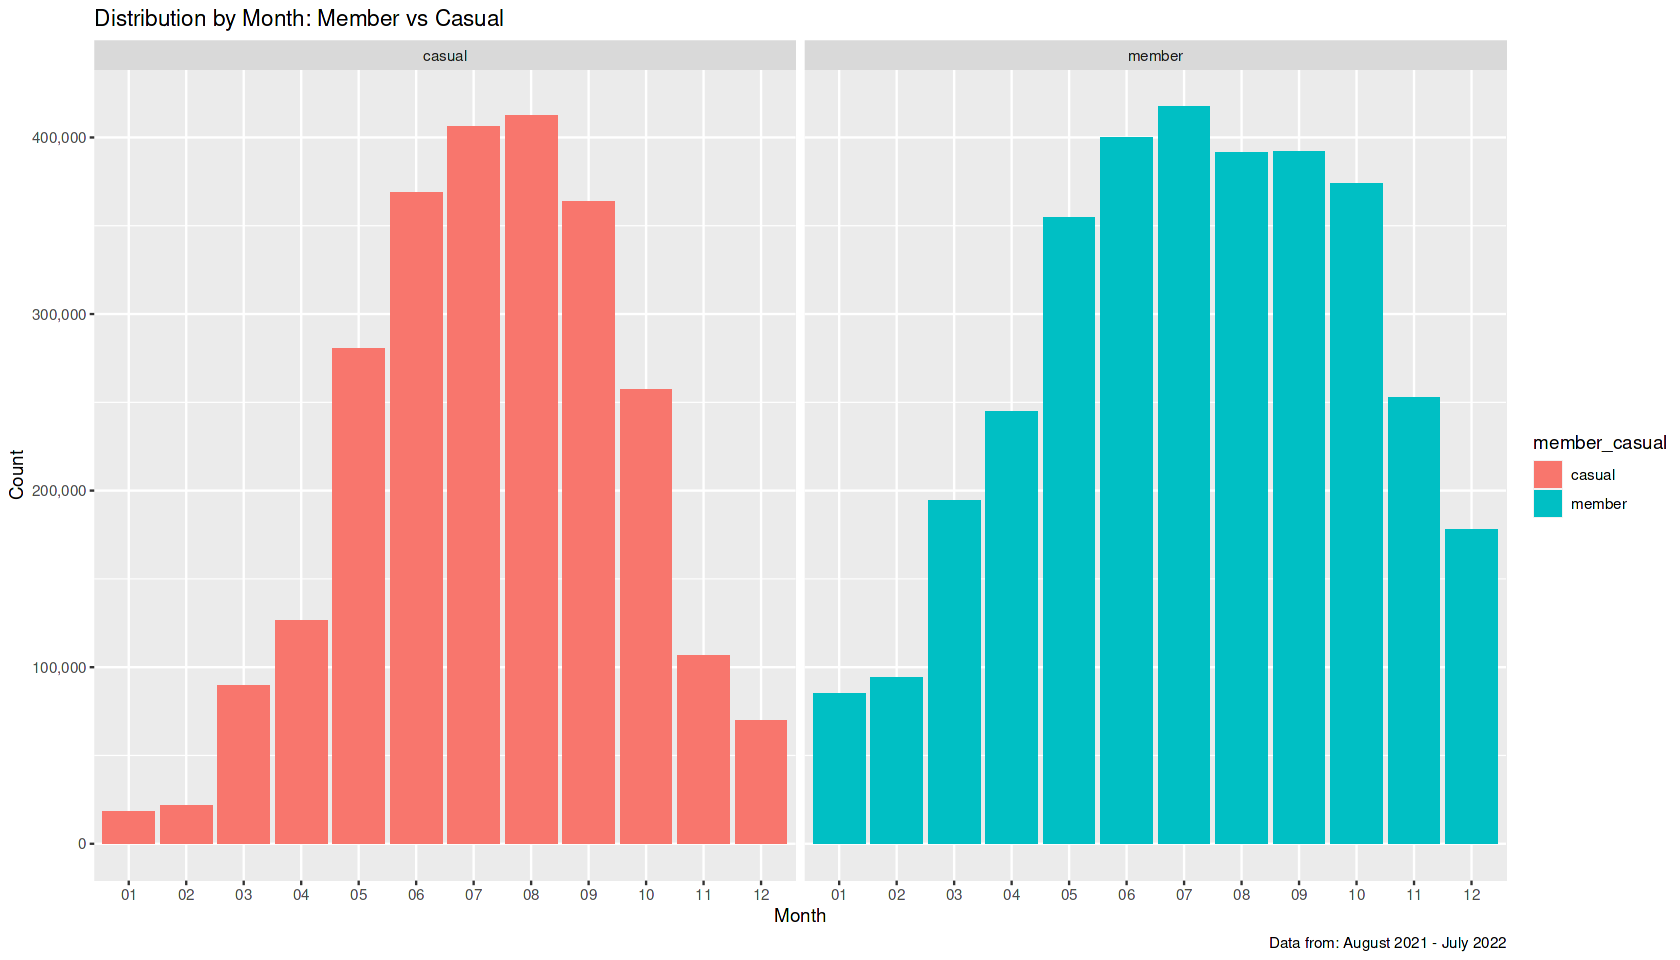

In [27]:
options(repr.plot.width=14, repr.plot.height=8)
ggplot(data=cleaned_data, aes(x=month, fill=member_casual))+
geom_bar()+
labs(title="Distribution by Month: Member vs Casual", caption="Data from: August 2021 - July 2022", x="Month", y="Count")+
scale_y_continuous(labels = scales::comma)+
facet_wrap(~member_casual)


In the month from May to october the rider count is  more than other months. So the  all member is love to ride on summer season.

In [28]:
# order the day_of_week 
cleaned_data$day_of_week <- ordered(cleaned_data$day_of_week, levels=c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

In [29]:
#summarize data according to day of week
cleaned_data %>%
    group_by(day_of_week) %>%
    summarise(count = length(ride_id),
              '%' = (length(ride_id) / nrow(cleaned_data)) * 100,
              'members_percent' = (sum(member_casual == "member") / length(ride_id)) * 100,
              'casual_percent' = (sum(member_casual == "casual") / length(ride_id)) * 100,
              'Member x Casual Perc Difer' = members_percent - casual_percent)

day_of_week,count,%,members_percent,casual_percent,Member x Casual Perc Difer
<ord>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Monday,771985,13.08266,61.18759,38.81241,22.375176
Tuesday,797129,13.50877,65.65399,34.34601,31.307982
Wednesday,804339,13.63095,64.97037,35.02963,29.940734
Thursday,838714,14.21350,62.31290,37.68710,24.625796
Friday,814246,13.79885,57.31032,42.68968,14.620643
Saturday,980957,16.62406,46.22608,53.77392,-7.547833
Sunday,893457,15.14122,46.77539,53.22461,-6.449219


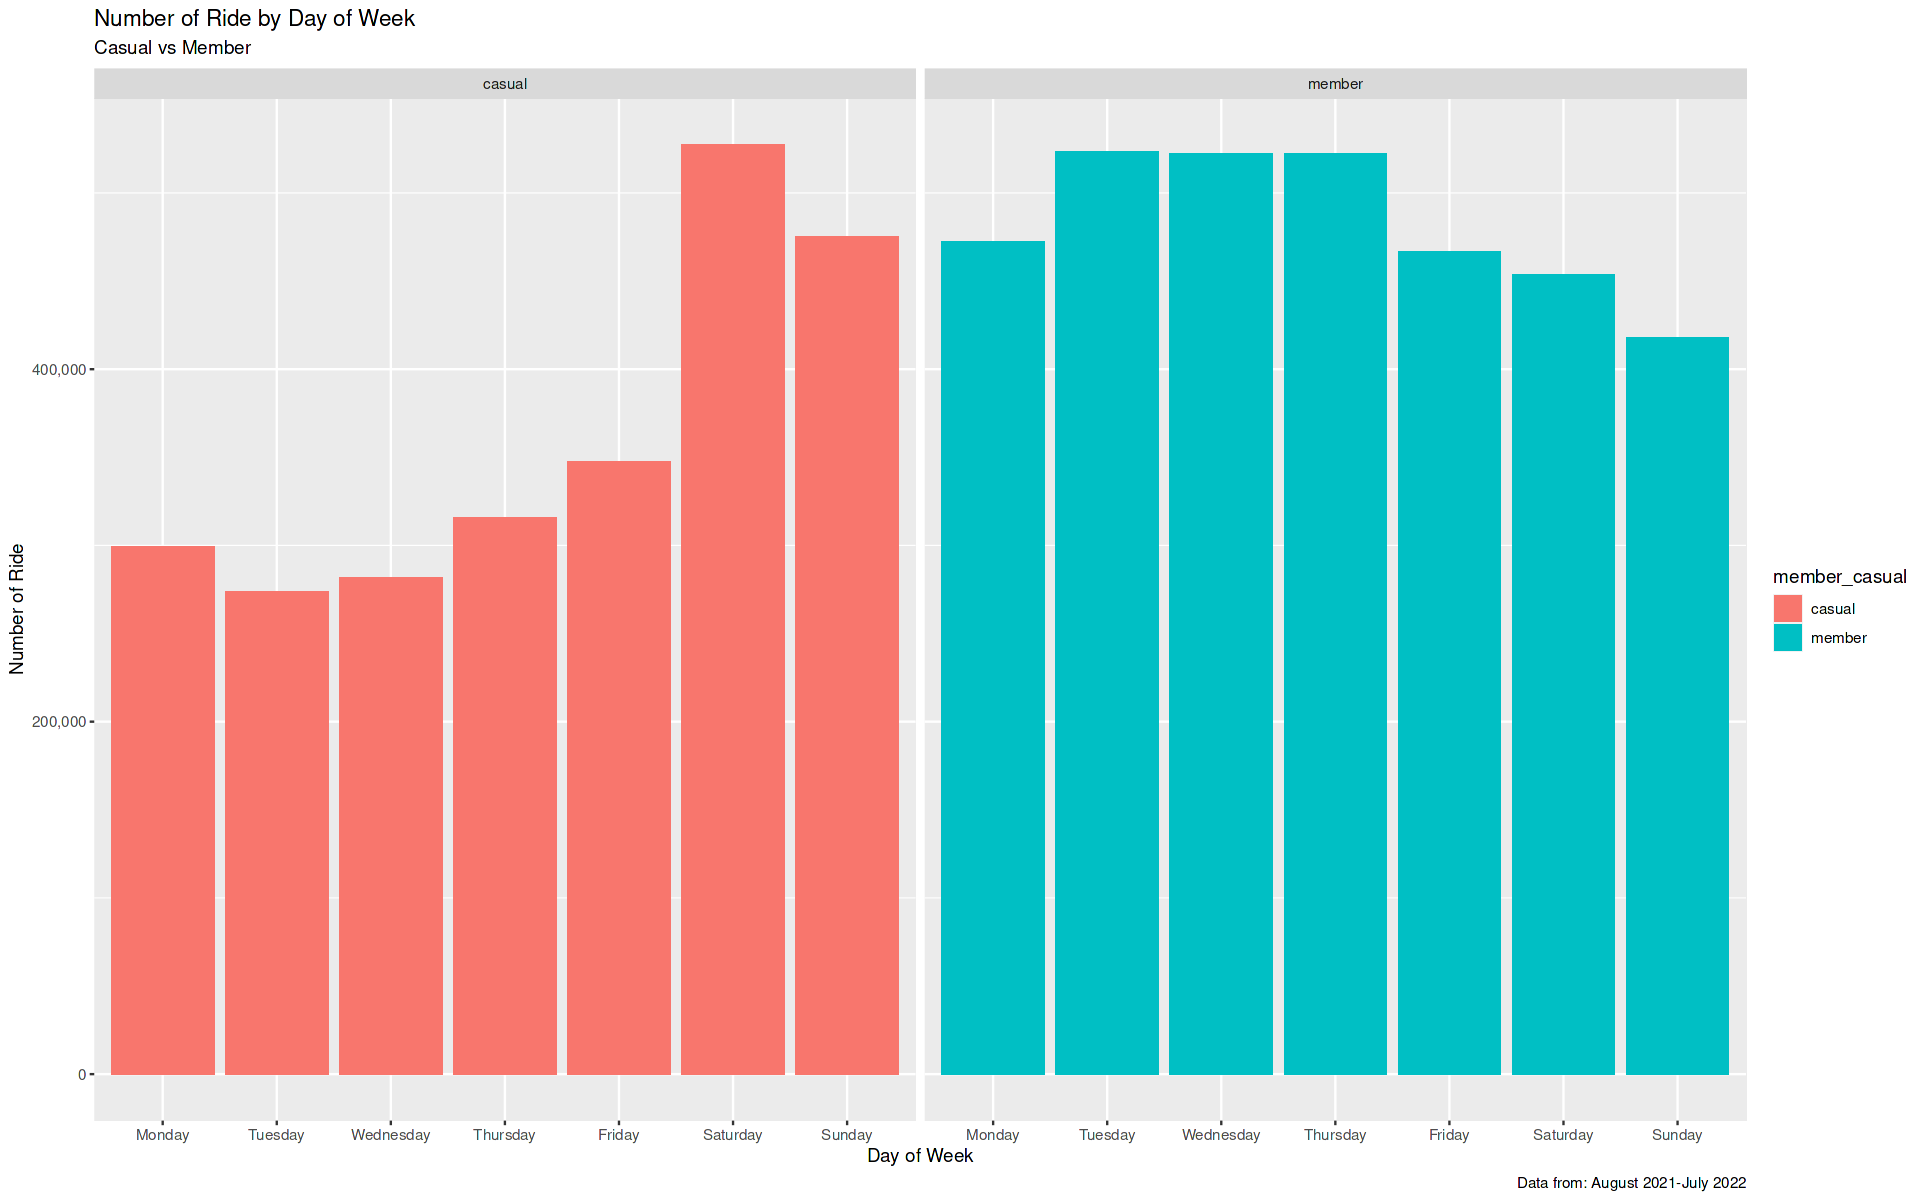

In [30]:
options(repr.plot.width=16, repr.plot.height=10)
ggplot(data=cleaned_data, aes(x=day_of_week,  fill=member_casual))+
       geom_bar()+
       facet_wrap(~member_casual)+
labs(title="Number of Ride by Day of Week", subtitle="Casual vs Member", caption="Data from: August 2021-July 2022", x="Day of Week", y="Number of Ride")+
scale_y_continuous(labels = scales::comma)

We can see that the percentage of Casual member is increases in a weekend according to the annual member. but on the weekdays the vice-verse.

In [31]:
#summarize data according to start hour
cleaned_data %>%
    group_by(start_hour) %>%
    summarise(count = length(ride_id),
              '%' = (length(ride_id) / nrow(cleaned_data)) * 100,
              'members_percent' = (sum(member_casual == "member") / length(ride_id)) * 100,
              'casual_percent' = (sum(member_casual == "casual") / length(ride_id)) * 100,
              'Member x Casual Perc Difer' = members_percent - casual_percent)

start_hour,count,%,members_percent,casual_percent,Member x Casual Perc Difer
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
0,87518,1.4831480,41.46119,58.53881,-17.0776297
1,57624,0.9765411,39.69006,60.30994,-20.6198806
2,35486,0.6013733,37.09350,62.90650,-25.8129967
3,20878,0.3538148,38.17415,61.82585,-23.6516908
4,18529,0.3140068,49.54396,50.45604,-0.9120838
5,47328,0.8020571,71.80316,28.19684,43.6063218
6,119246,2.0208354,76.13589,23.86411,52.2717743
7,225477,3.8211085,76.59717,23.40283,53.1943391
8,273731,4.6388582,74.24515,25.75485,48.4903062


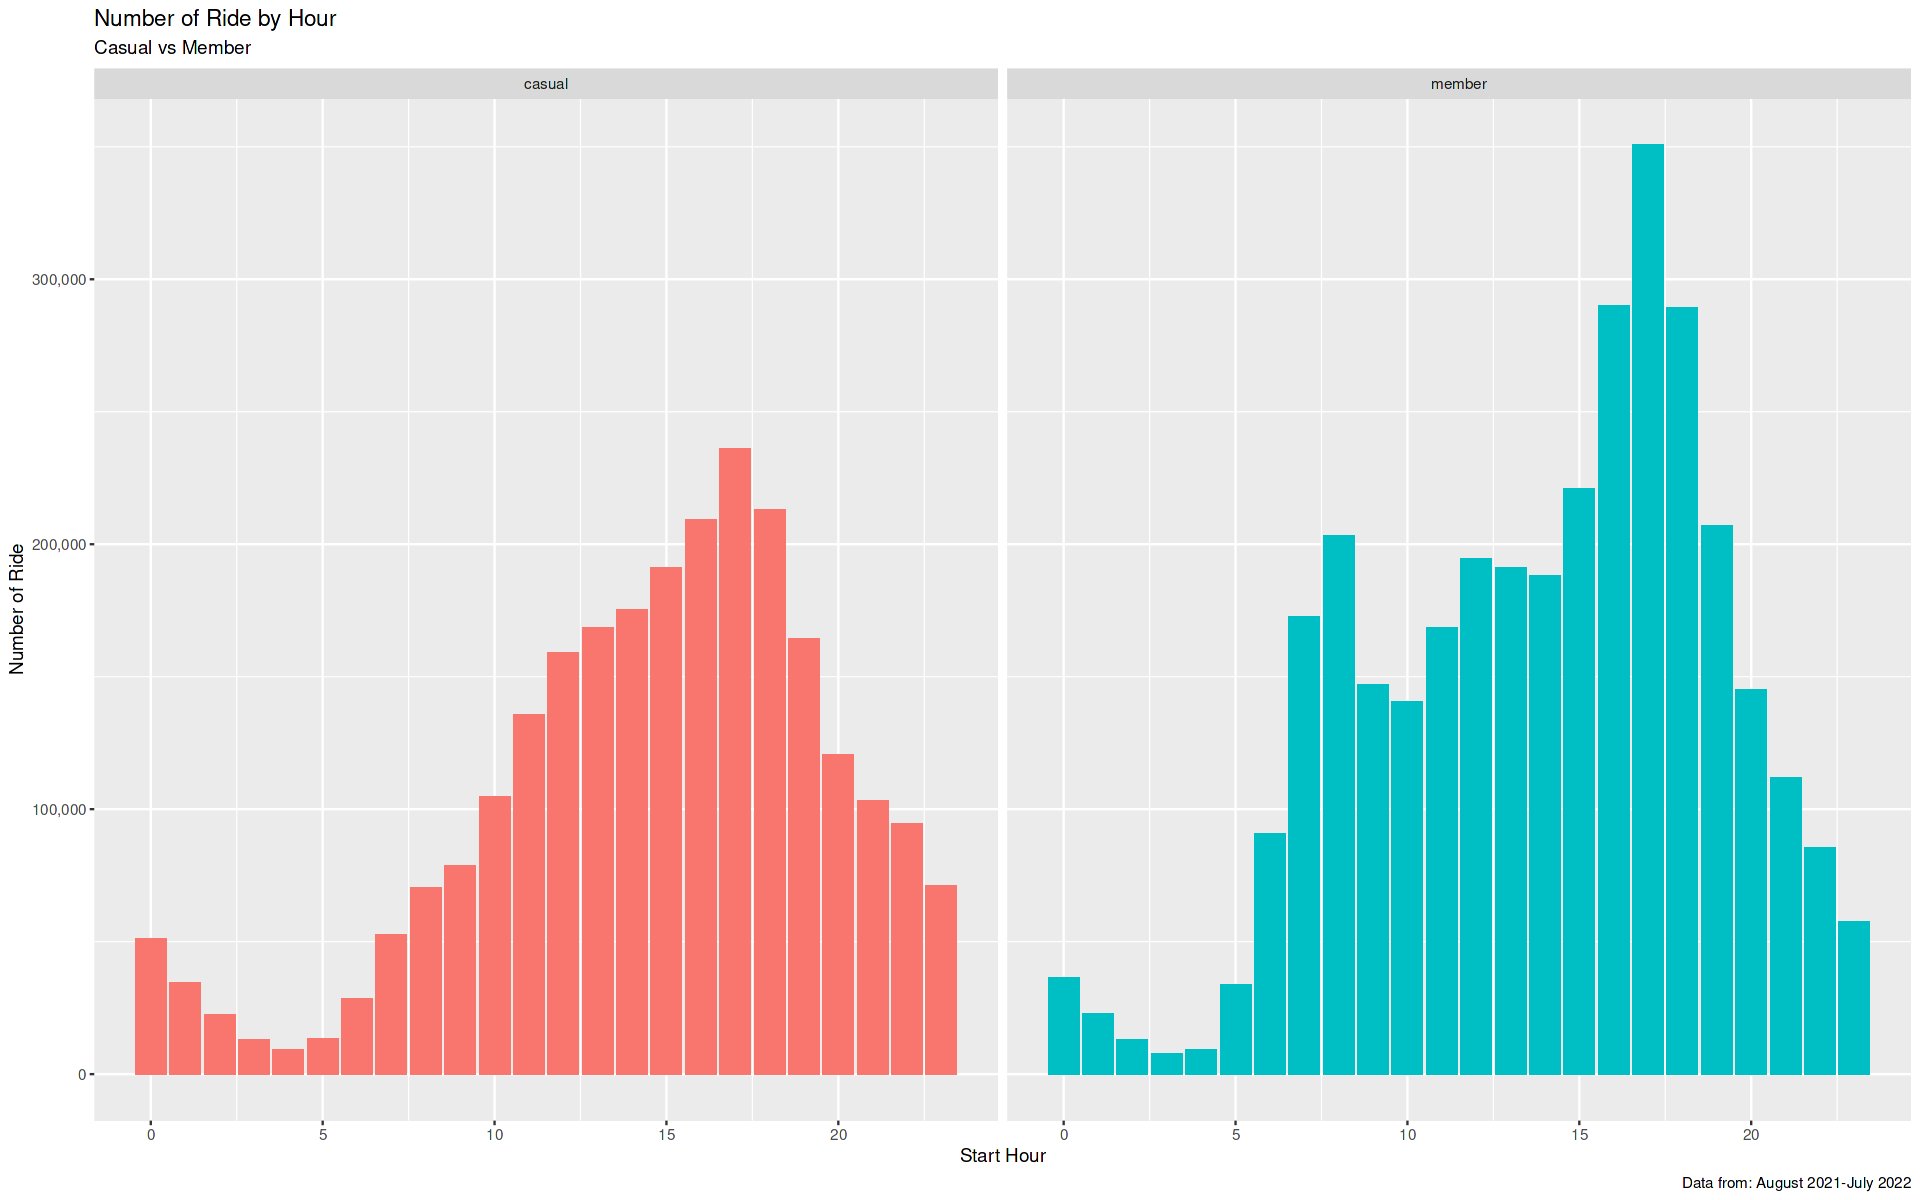

In [32]:
ggplot(cleaned_data, aes(x=start_hour, fill= member_casual))+
geom_bar(show.legend=F)+
facet_wrap(~member_casual)+
labs(title="Number of Ride by Hour", subtitle="Casual vs Member", caption="Data from: August 2021-July 2022", x="Start Hour", y="Number of Ride")+
scale_y_continuous(labels=scales::comma)

we can see that
* Both casual and member riders are more like to ride between 4pm to 6 pm.
* we have more member during morning,between 7am to 8am.
* Now we know that the riding rush hour time of both member is 4pm to 6pm.  

In [45]:
#average duration 
viz <- cleaned_data%>%
    mutate("Weekdays"= cleaned_data$day_of_week)%>%
    group_by(Weekdays, member_casual)%>%
    summarise(num_of_ride = n(), average_duration = mean(ride_duration_min))%>%
    arrange(member_casual, Weekdays)

tibble(viz)

`summarise()` has grouped output by 'Weekdays'. You can override using the
`.groups` argument.


Weekdays,member_casual,num_of_ride,average_duration
<ord>,<chr>,<int>,<dbl>
Monday,casual,299626,29.72422
Tuesday,casual,273782,25.45607
Wednesday,casual,281757,25.00378
Thursday,casual,316087,26.19856
Friday,casual,347599,27.40979
Saturday,casual,527499,31.83880
Sunday,casual,475539,33.97274
Monday,member,472359,12.56823
Tuesday,member,523347,12.14701


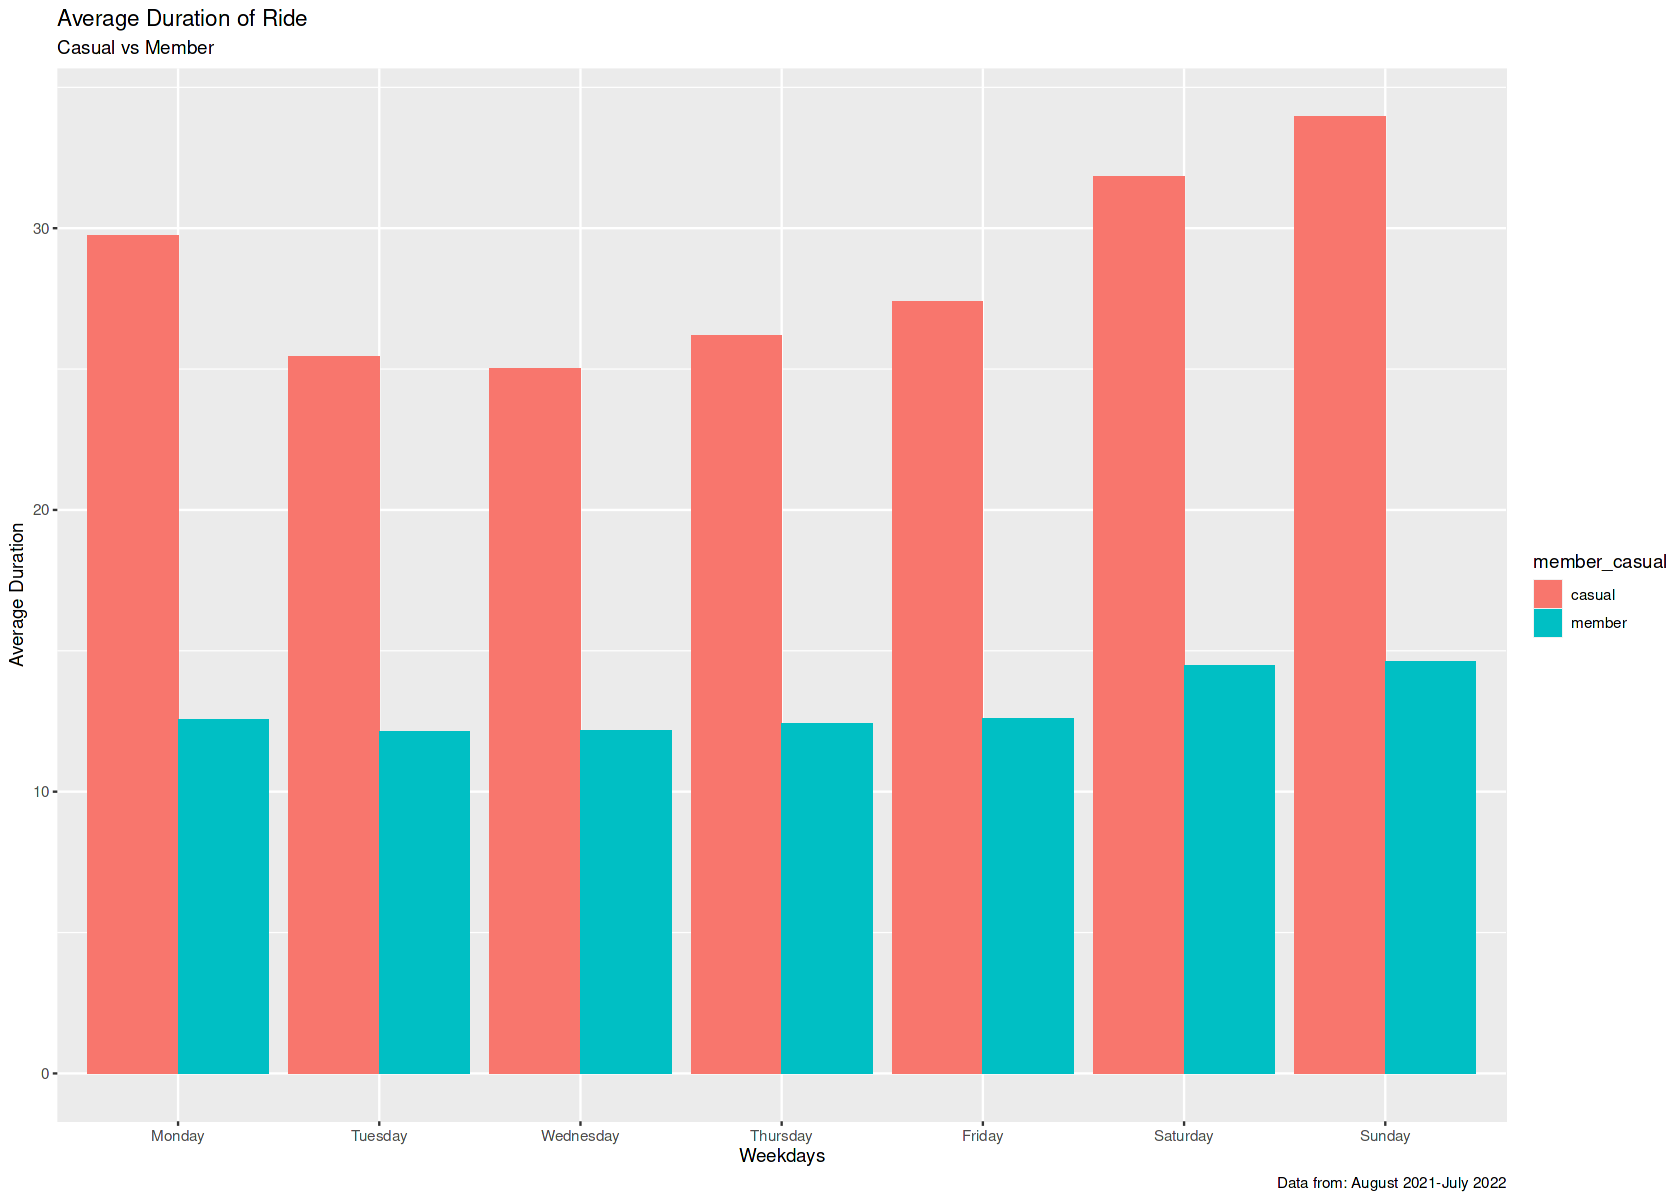

In [53]:
options(repr.plot.width=14, repr.plot.height=10)
ggplot(viz, aes(x=Weekdays, y=average_duration, fill=member_casual))+
geom_col(position="dodge")+
labs(title="Average Duration of Ride", subtitle="Casual vs Member", caption='Data from: August 2021-July 2022', y='Average Duration')


We can see that
* The average duration of casual riders ride is more than 20 minutes and annual member ride is less than 15 minutes.
* Casual have more riding time than members


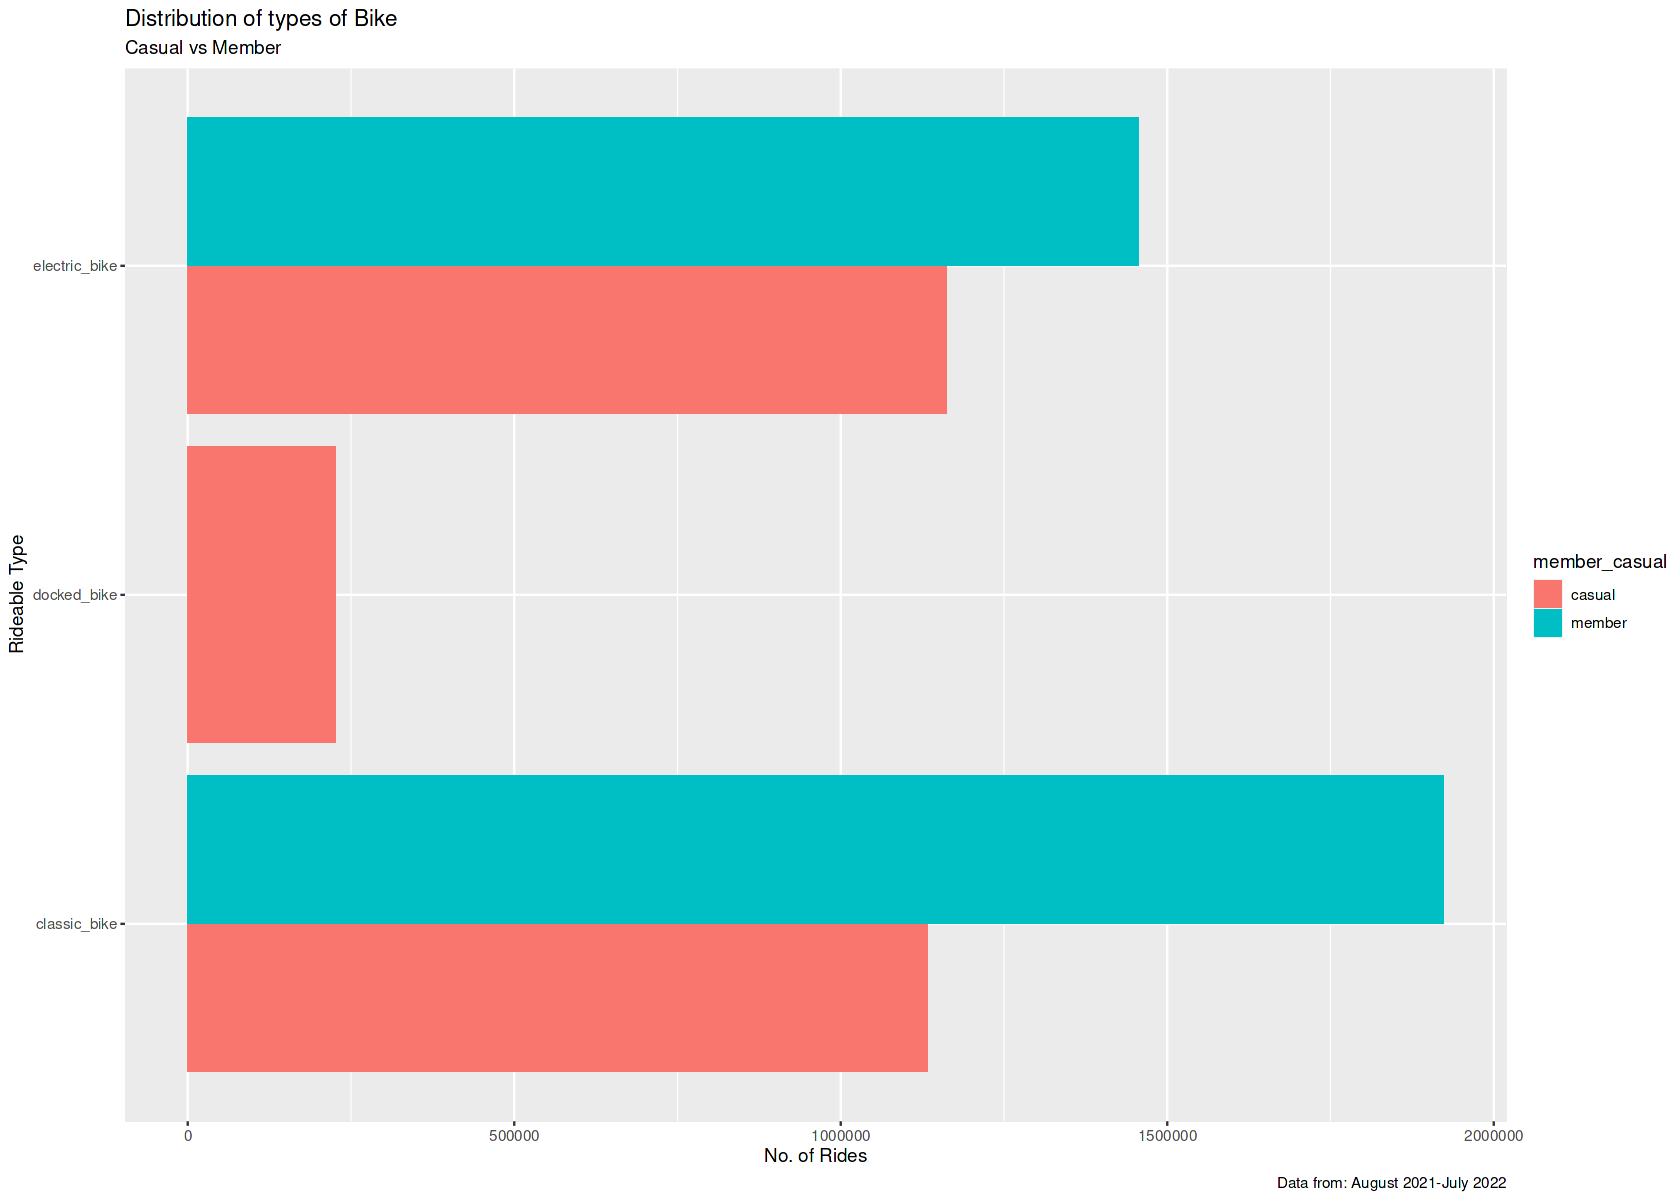

In [61]:
ggplot(cleaned_data, aes(rideable_type, fill=member_casual))+
geom_bar(position="dodge")+
coord_flip()+
labs(title="Distribution of types of Bike", subtitle="Casual vs Member", caption='Data from: August 2021-July 2022', x= "Rideable Type" , y='No. of Rides')

Note that:
* Classic bike have the biggest volume of rides.
* Member have a bigger preference for Classic bikes, also electric bikes.


### Share

Let's go through the main finds and try to arrive at a conclusion.

What we know about the dataset:
* The average duration of casual members is longer than annual member.
* The annual member is 14% more than the casual member.
* In all months we have more members' rides than casual rides.
* There's a bigger volume of bikers in the afternoon.
* Although classic bike and electric bike was used for more number of rides according to docked bikes.
* The No. of rides of Casual member is increases in a weekend according to the annual member. but on the weekdays the vice-verse.

### Act

**Recommendations**

* Casual rides could be offered discounted weekdays passes to increase their ridership on weekdays. Members could be offered discounted weekend passes to increase their ridership on weekend.
* The average ride duration of casual rider is longer than annual members. So we should give offer, the more you ride the more you get discount on annual membership it will encourage the casual user to get attracted.
* The marketing strategy and the ads campaign should aim at casual users during the weekend.
* Releasing monthly or 6 month memberships will be great for increasing casual member convert into annual member. This monthly or 6 month membership will attract casual member during a peak month may to October.
